In [ ]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','Messages'])
df

,label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Check for leading or trailing whitespace
df['label'] = df['label'].str.strip()

In [ ]:
#checkiing for null value
df.isnull().sum()

label       0
Messages    0
dtype: int64

In [ ]:
#viewing the status of the plot
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#characteristics of the plot
df.describe()

,label,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['label']=df['label'].map({'ham': 0,'spam': 1})
df

,label,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

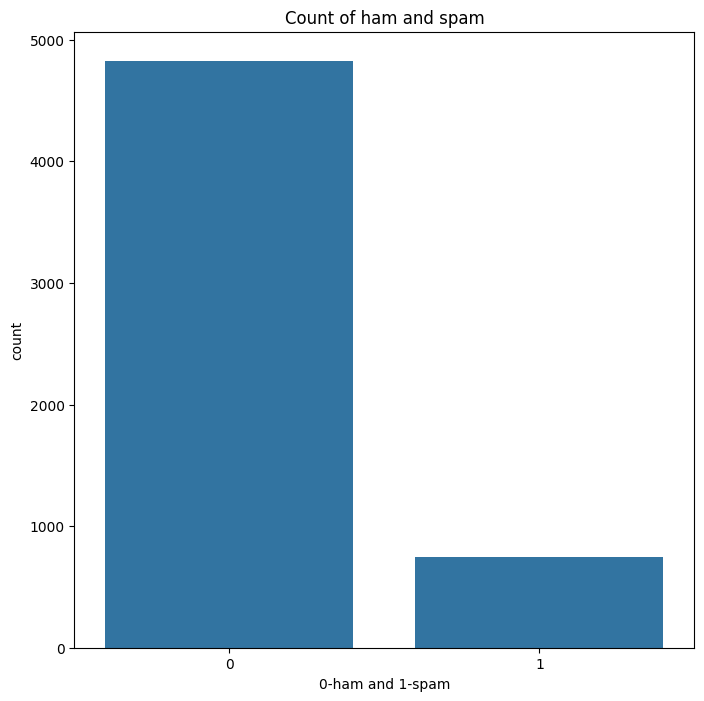

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='label',data=df)
plt.title('Count of ham and spam')
plt.xlabel('0-ham and 1-spam')
plt.show()

In [ ]:
only_spam=df[df['label']==1]
only_spam

,label,Messages
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
print("Spam:",len(only_spam))
print("Ham:",len(df)-len(only_spam))

Spam: 747
Ham: 4825


In [ ]:
#checking how many times we need to relicate the data
count=int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [ ]:
for i in range(0,count-1):
  df=pd.concat([df,only_spam])
df.shape[0]

9307

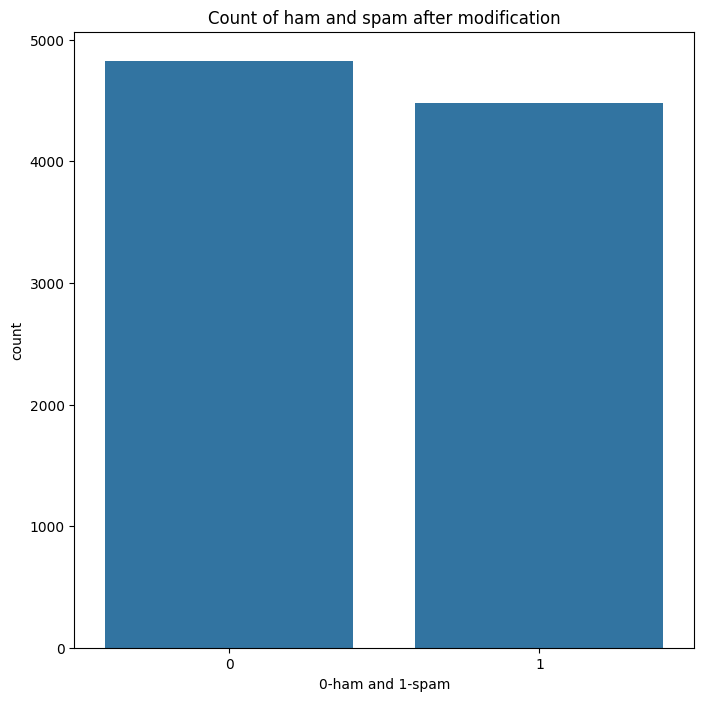

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='label',data=df)
plt.title('Count of ham and spam after modification')
plt.xlabel('0-ham and 1-spam')
plt.show()

In [ ]:
df['word_count'] = df['Messages'].apply(lambda x: len(x.split()))  # Replace 'text' if necessary

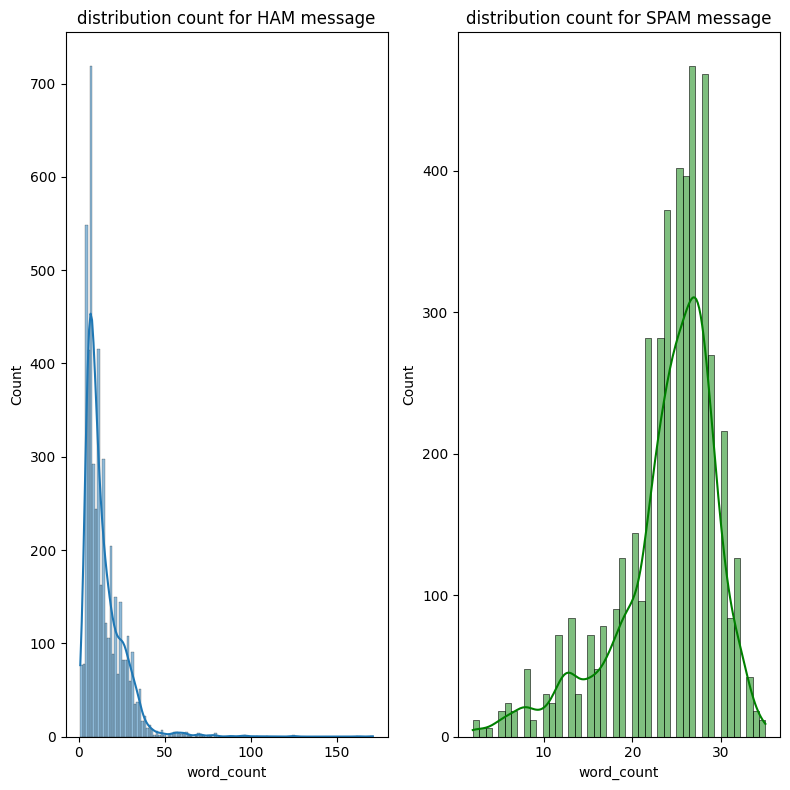

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
g=sns.histplot(df[df['label']==0].word_count,kde=True)
p=plt.title("distribution count for HAM message")
plt.subplot(1,2,2)
sns.histplot(df[df['label']==1].word_count,kde=True,color='green')
plt.title("distribution count for SPAM message")
plt.tight_layout()
plt.show()


In [ ]:
def curr(x):
  currency_symbol=['$','£','€','¥']
  for i in currency_symbol:
    if i in x:
      return 1
  return 0
df['currency_symbol']=df['Messages'].apply(curr)
df

,label,Messages,word_count,currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


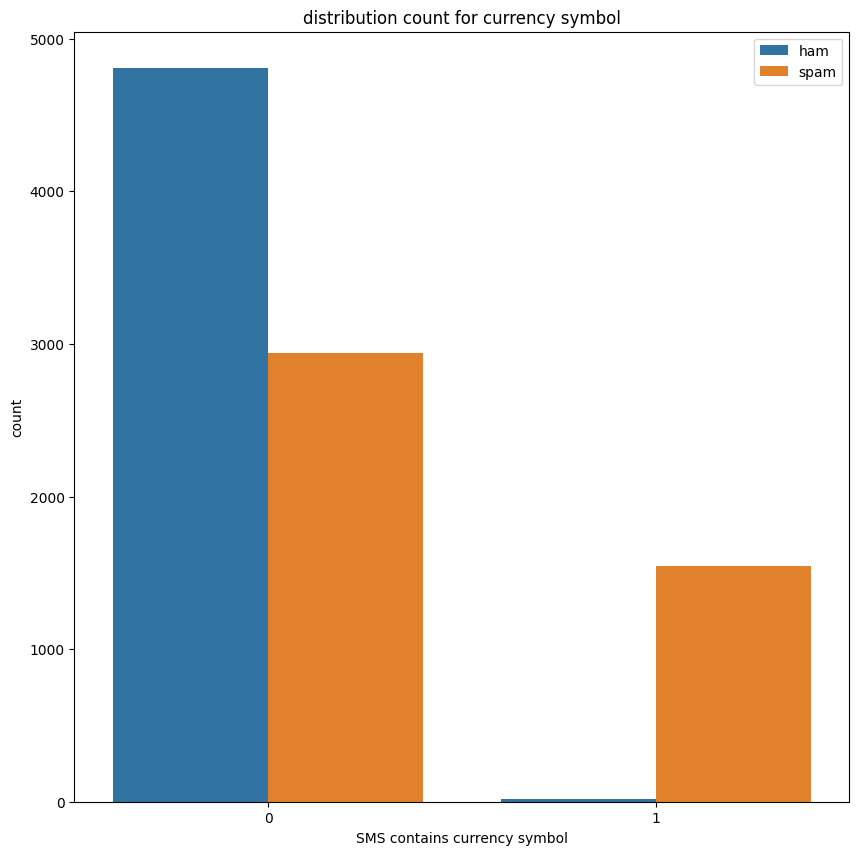

In [ ]:
plt.figure(figsize=(10,10))
g=sns.countplot(x='currency_symbol',data=df,hue='label')
p=plt.title("distribution count for currency symbol")
plt.xlabel('SMS contains currency symbol')
plt.ylabel('count')
plt.legend(['ham','spam'])
plt.show()

In [ ]:
def checker(x):
  for i in x:
    if ord(i) >=47 and ord(i) <=57:
      return 1
  return 0
df['contains_numbers']=df['Messages'].apply(checker)
df

,label,Messages,word_count,currency_symbol,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


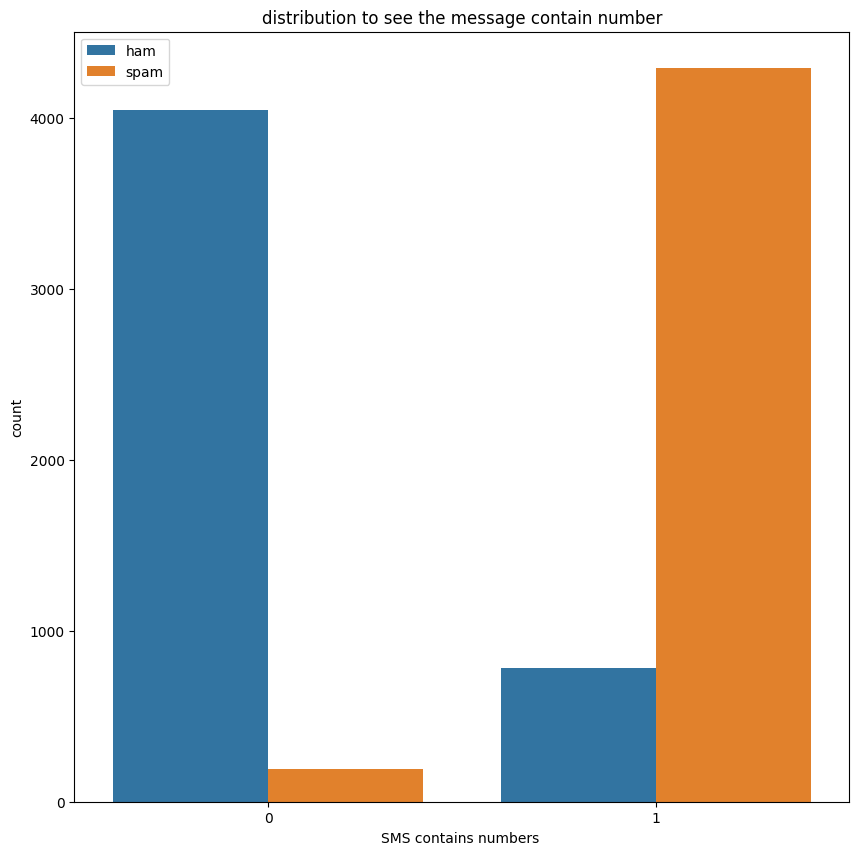

In [ ]:
plt.figure(figsize=(10,10))
g=sns.countplot(x='contains_numbers',data=df,hue='label')
p=plt.title("distribution to see the message contain number")
plt.xlabel('SMS contains numbers ')
plt.ylabel('count')
plt.legend(['ham','spam'])
plt.show()

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(df.Messages):
  sms=re.sub('[^a-zA-Z]',repl=' ',string=sms)
  sms=sms.lower()
  words=sms.split()
  filter_word=[word for word in words if word not in set(stopwords.words('english'))]
  lemm_words=[wnl.lemmatize(word) for word in filter_word]
  sms=" ".join(lemm_words)
  corpus.append(sms)

In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vector=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [ ]:
x=pd.DataFrame(vector,columns=feature_names)
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
cv=cross_val_score(model,x,y,cv=5,scoring='f1')
cv.mean()

0.9416493362923031

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1107
           1       0.94      0.94      0.94      1034

    accuracy                           0.94      2141
   macro avg       0.94      0.94      0.94      2141
weighted avg       0.94      0.94      0.94      2141



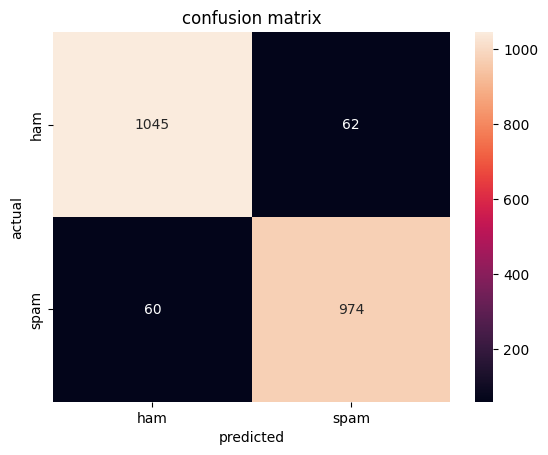

In [ ]:


cm=confusion_matrix(y_test,y_pred)
axis_labels=['ham','spam']
sns.heatmap(cm,xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
cv=cross_val_score(model,x,y,cv=5,scoring='f1')
cv.mean()

0.9803808839551913

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

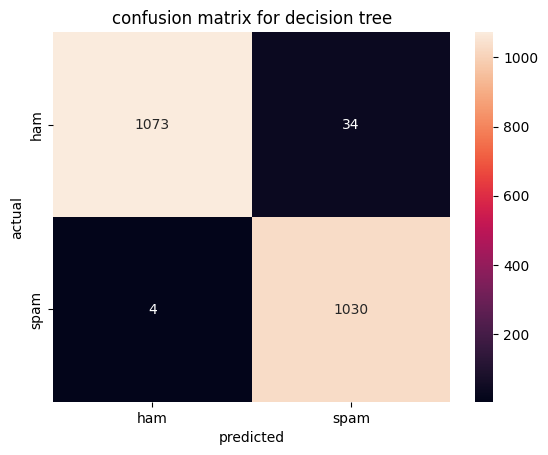

In [ ]:
cm=confusion_matrix(y_test,y_pred)
axis_labels=['ham','spam']
sns.heatmap(cm,xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',annot=True)
plt.title('confusion matrix for decision tree')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
def predict_spam(sms):
  sms=re.sub('[^a-zA-Z]',repl=' ',string=sms)
  sms=sms.lower()
  words=sms.split()
  filter_word=[word for word in words if word not in set(stopwords.words('english'))]
  lemm_words=[wnl.lemmatize(word) for word in filter_word]
  sms=" ".join(lemm_words)
  temp=tfidf.transform([sms]).toarray()
  return model.predict(temp)

In [ ]:
sample_message="Act now and save big! Limited-time offer 40% our latest collection. Visit our website for more details!"
if predict_spam(sample_message):
  print('spam')
else:
  print('ham')

ham
